# Dimensionality Reduction

# PCA

Principal Component Analysis is a dimensionality reduction algorithm. The main steps of PCA are:

- **standardization**: to standardize the range of the continuous variables so that each of them contribute equally to the analysis. A common way to do that is by computing Z-score: $z = \frac{\text{data } - \text{ mean}}{\text{standard deviation}}$; this way all the data will have mean zero and standard deviation one.

- **covariance matrix**: its computation is useful in order to understand how variables vary from the mean with respect to each other. In other words, to understand if any data is correlated: if that is the case, there is going to be some information redundancy. So, the covariance matrix allows to see how variables covariate (they could be positive or negatively correlated).

- **extract eigenvalues and eigenvectors**: this is the step in which principal components are computed. PCs are new variables constructed as linear combinations of the starting variables, in such a way that they are uncorrelated and carrying the highest possible variance. PCA builds up new variables (PCs) where the first ones are those carrying most of the variance, so that each subsequent PC carries less variance than the previous one. So, the aim is to reduce dimensionality while keeping most of the explained variance. The first PC is found maximizing the variance (i.e. finding the eigenvector associated to the largest eigenvalue). The following ones are computed in the same way, but they have to be uncorrelated (orthogonal) to the previous ones.

- **data 'recasting'**: finding PCs does not change the actual data, which, in fact, it is still represented in terms of the original axes. So, in this step, data has to be reoriented from the original axes to the one represented by the PCs. This is done by multiplying the transpose of the original data by the transpose of the 'feature vector' (which is the matrix formed by the previously selected eigenvectors).

In practice, PCA is computed by three possible methods:

1. **Covariance**, used when data have similar scales;


2. **Correlation**, used when data have different scales;


3. **Singular Value Decomposition**, more general purpose.

**PROS**:

- It is good at extracting signal from noise
- Computationally inexpensive (time wise)
- Good for linear data

**CONS**:

- Not appropriate for non-linear data
- Variables are less interpretable after transformation
- Data standardization is required
- Information loss, even if PCA tries to maximize the variance, the number of PCs has to be selected with care.


### PCA first practical example

In [200]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from seaborn import color_palette
from matplotlib.lines import Line2D

In [70]:
#Load MNIST dataset

mnist = fetch_openml('mnist_784')

MNIST is divided in ```data``` (which contains pixel for each image) and ```target``` (label indicating the real number associated to the image 0-9)

In [79]:
X = mnist.data / 255
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


Convert the matrix ```X``` and the vector ```y``` in a Pandas DataFrame:

In [80]:
feat_cols = [i for i in X.columns] #name of the columns (from pixel1 to pixel784)

df = pd.DataFrame(X)
df['y'] = y
df['label'] = df['y'].apply(lambda i : str(i)) #transform each y value, from an integer into a string

print(f'Size of the DataFrame: {df.shape}')

Size of the DataFrame: (70000, 786)


In [81]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


Since the dataset is sorted by y labels, it's wise to shuffle it

In [255]:
np.random.seed(42)

df_shuffled = df.sample(frac = 1)

In [122]:
pca = PCA(n_components = 3)

#we use featcol of df, since it does not contain y
pca_result = pca.fit_transform(df[feat_cols].values) #train the model and apply it to the testing data in one shot (since train and test data are the same in this case)
df['pc_one'] = pca_result[:, 0]
df['pc_two'] = pca_result[:, 1]
df['pc_three'] = pca_result[:, 2]

print(f'Explained variation per principal component {pca.explained_variance_ratio_}')

Explained variation per principal component [0.09746116 0.07155445 0.06149531]


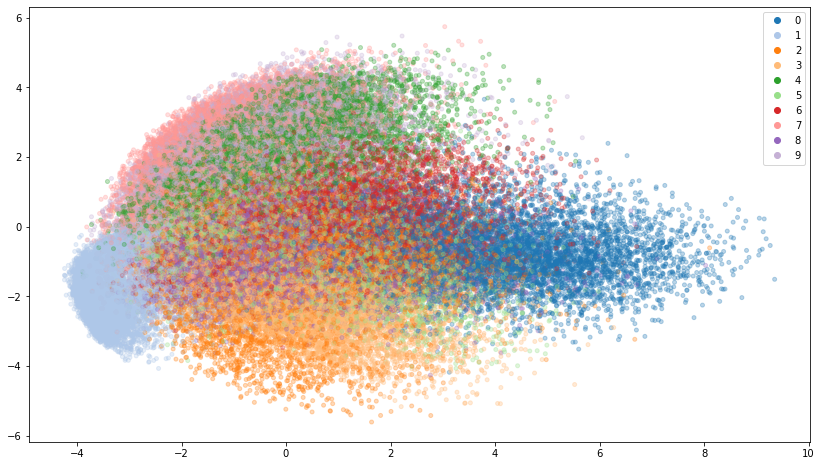

In [212]:
colors = color_palette('tab20')

fig = plt.figure(figsize = (14, 8))

plt.scatter(x = df.pc_one, y = df.pc_two, s = 16, color = [colors[i] for i in df.y.transform(lambda x : int(x))],
            label = [colors[i] for i in df.y.transform(lambda x : int(x))],
            alpha = 0.3)

custom_legend = []

for i in sorted(df.y.transform(lambda x : int(x)).unique()):
    custom_legend.append(Line2D([0], [0], marker = 'o', color = colors[i], label = i, markersize = 6, linewidth = 0))


plt.legend(handles = custom_legend)

plt.show()

equivalently:

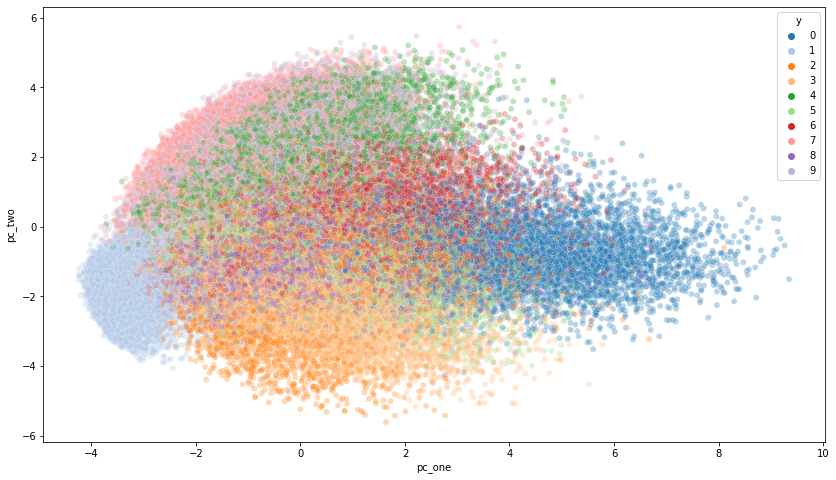

In [141]:
import seaborn as sns

plt.figure(figsize = (14, 8))

sns.scatterplot(x = df.pc_one, y = df.pc_two, hue = df.y,
           palette = sns.color_palette('tab20', 10),
           legend = 'full',
           alpha = 0.3)

plt.show()

## PCA second example

In [214]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

In [218]:
breast = load_breast_cancer()

X = breast.data
y = breast.target

print(X.shape, y.shape)

(569, 30) (569,)


In [252]:
feat_cols = [i for i in breast.feature_names] #name of the columns (from pixel1 to pixel784)

df = pd.DataFrame(X, columns = feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i : str(i)) #transform each y value, from an integer into a string

print(f'Size of the DataFrame: {df.shape}')

Size of the DataFrame: (569, 32)


In [253]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,0


In [254]:
np.random.seed(42)

df_shuffled = df.sample(frac = 1)

In [272]:
pca = PCA(n_components = 2)

#we use featcol of df, since it does not contain y
pca_result = pca.fit_transform(df[feat_cols].values) #train the model and apply it to the testing data in one shot (since train and test data are the same in this case)
df['pc_one'] = pca_result[:, 0]
df['pc_two'] = pca_result[:, 1]

print(f'Explained variation per principal component {pca.explained_variance_ratio_}')

Explained variation per principal component [0.98204467 0.01617649]


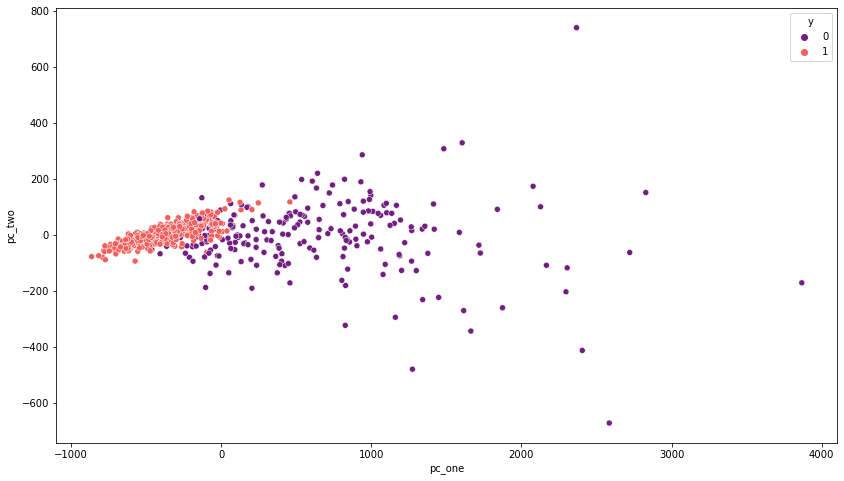

In [275]:
import seaborn as sns

plt.figure(figsize = (14, 8))

sns.scatterplot(x = df.pc_one, y = df.pc_two, hue = df.y,
           palette = sns.color_palette('magma', 2),
           legend = 'full')

plt.show()

## Multidimensional Scaling (MDS)

Multidimensional Scaling is a family of dimensionality reduction algorithms. In this perspective PCA is a particular case of Multidimensional Scaling. 